10 clustering algorithms with python

https://machinelearningmastery.com/clustering-algorithms-with-python/

>>> also brought in my wine classifier - TITANIC

In [0]:
 ! pip install -q kaggle

upload kaggle.json

In [0]:
! mkdir ~/.kaggle 

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

# Download Data

In [10]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-11 13:32:24          49847  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           3026  
fireballbyedimyrnmom/us-counties-covid-19-dataset              US counties COVID 19 dataset                        428KB  2020-04-13 12:04:39           3495  
ryanxjhan/cbc-news-coronavirus-articles-march-26               CBC News Coronavirus/COVID-19 Articles (NLP)          6MB  2020-03-27 23:23:07            699  
bappekim/air-pollution-in-seoul               

In [17]:
! kaggle download -d 'Classifying wine varieties'

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'download' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [0]:
pd.read_csv('https://raw.githubusercontent.com/rpi-techfundamentals/fall2018-materials/master/input/train.csv')

>>> could not find dataset -- just downloaded
wineuci.zip
and uploaded here

In [18]:
! unzip wineuci.zip

Archive:  wineuci.zip
  inflating: Wine.csv                


In [20]:
df=pd.read_csv('Wine.csv',header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [22]:
df.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head(2)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [24]:
# check for missing values
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64


# Heatmap for Correlation of Parameters


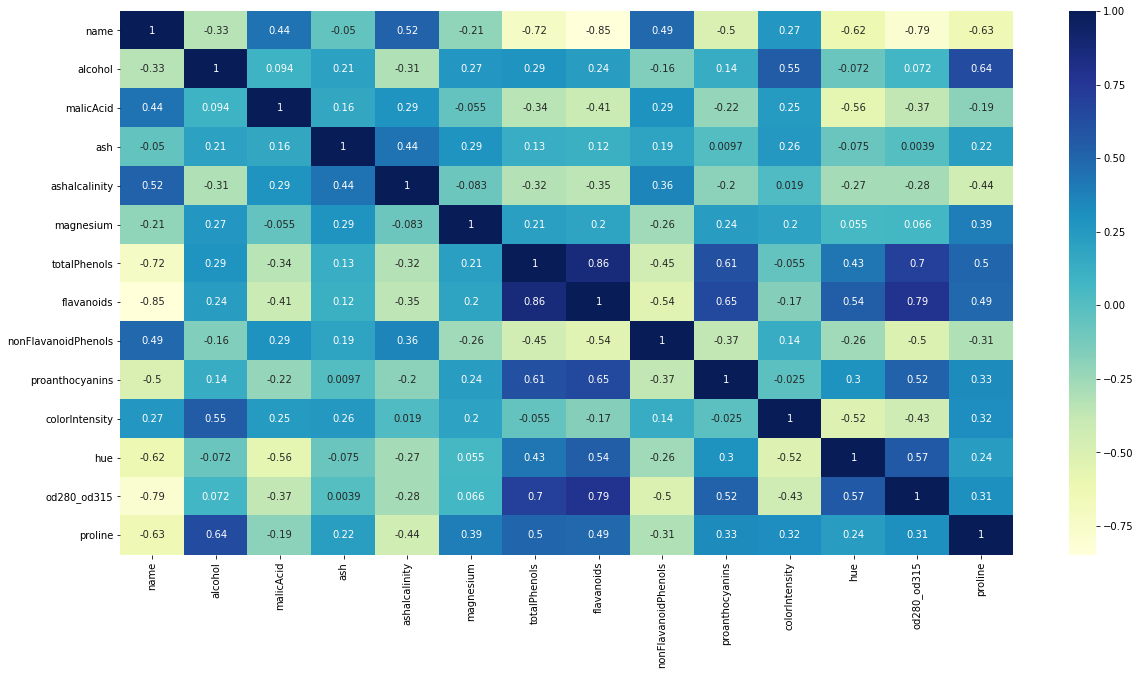

In [26]:
import seaborn as sns
plt.figure(figsize=(20,10))
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)


In [27]:
# ash is least correlated so drop
X= df.drop(['name','ash'], axis=1)
X.head()



,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
df.tail()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [31]:
# labels
Y=df.iloc[:,:1]
Y.head(2)

,name
0,1
1,1


In [32]:
Y.tail(2)

,name
176,3
177,3


## Clustering Dataset

use wine dataset

The dataset will have 1,000 examples, with two input features and one cluster per class. The clusters are visually obvious in two dimensions so that we can plot the data with a scatter plot and color the points in the plot by the assigned cluster. This will help to see, at least on the test problem, how “well” the clusters were identified.

The clusters in this test problem are based on a multivariate Gaussian, and not all clustering algorithms will be effective at identifying these types of clusters. As such, the results in this tutorial should not be used as the basis for comparing the methods generally.

An example of creating and summarizing the synthetic clustering dataset is listed below.

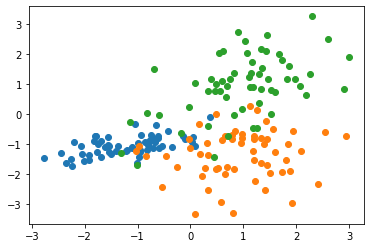

In [44]:
# wine classification dataset, with only 2 features
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=178, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(3):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example creates the synthetic clustering dataset, then creates a scatter plot of the input data with points colored by class label (idealized clusters).

We can clearly see two distinct groups of data in two dimensions and the hope would be that an automatic clustering algorithm can detect these groupings.

Next, we can start looking at examples of clustering algorithms applied to this dataset.

I have made some minimal attempts to tune each method to the dataset.

## Affinity Propagation

Affinity Propagation involves finding a set of exemplars that best summarize the data.

    We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

— Clustering by Passing Messages Between Data Points, 2007.

The technique is described in the paper:

    Clustering by Passing Messages Between Data Points, 2007.

It is implemented via the AffinityPropagation class and the main configuration to tune is the “damping” set between 0.5 and 1, and perhaps “preference.”

The complete example is listed below.

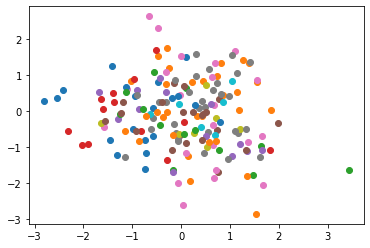

In [46]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=13, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, I could not achieve a good result.

## Agglomerative Clustering

Agglomerative clustering involves merging examples until the desired number of clusters is achieved.

It is a part of a broader class of hierarchical clustering methods and you can learn more here:

    Hierarchical clustering, Wikipedia.

It is implemented via the AgglomerativeClustering class and the main configuration to tune is the “n_clusters” set, an estimate of the number of clusters in the data, e.g. 2.

The complete example is listed below.

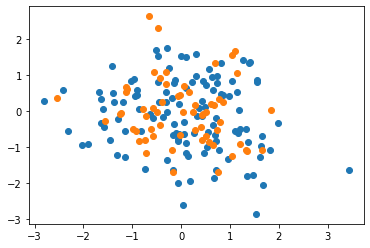

In [41]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=178, n_features=13, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found.

## BIRCH

BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

    BIRCH incrementally and dynamically clusters incoming multi-dimensional metric data points to try to produce the best quality clustering with the available resources (i. e., available memory and time constraints).

— BIRCH: An efficient data clustering method for large databases, 1996.

The technique is described in the paper:

    BIRCH: An efficient data clustering method for large databases, 1996.

It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters.

The complete example is listed below.

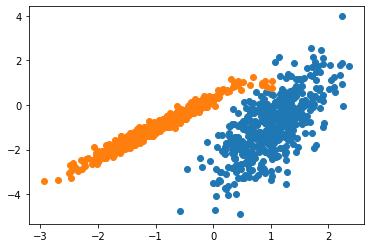

In [0]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, an excellent grouping is found.

## DBSCAN

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

    … we present the new clustering algorithm DBSCAN relying on a density-based notion of clusters which is designed to discover clusters of arbitrary shape. DBSCAN requires only one input parameter and supports the user in determining an appropriate value for it

— A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise, 1996.

The technique is described in the paper:

    A Density-Based Algorithm for Discovering Clusters in Large Spatial Databases with Noise, 1996.

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

The complete example is listed below.

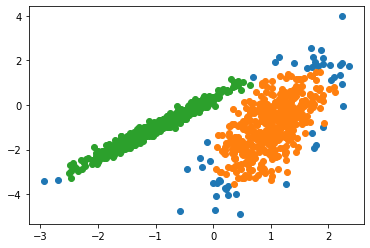

In [0]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Running the example fits the model on the training dataset and predicts a cluster for each example in the dataset. A scatter plot is then created with points colored by their assigned cluster.

In this case, a reasonable grouping is found, although more tuning is required.

### K-Means

K-Means Clustering may be the most widely known clustering algorithm and involves assigning examples to clusters in an effort to minimize the variance within each cluster.

    The main purpose of this paper is to describe a process for partitioning an N-dimensional population into k sets on the basis of a sample. The process, which is called ‘k-means,’ appears to give partitions which are reasonably efficient in the sense of within-class variance.

— Some methods for classification and analysis of multivariate observations, 1967.

The technique is described here:

    k-means clustering, Wikipedia.

It is implemented via the KMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

The complete example is listed below.

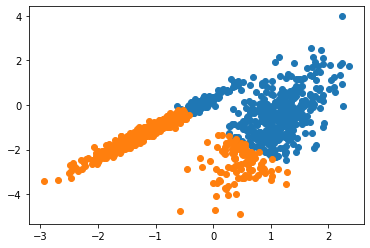

In [0]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()